In [1]:
# Requirements
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import stft
from pywt import wavedec
import IPython.display as ipd

plt.style.use('seaborn')

%matplotlib inline

# Audio signal

- [Audio signal](https://en.wikipedia.org/wiki/Audio_signal)
- [Digital audio](https://en.wikipedia.org/wiki/Digital_audio)

In [2]:
fs, x = wavfile.read('signals/audio/ja_female.wav')
dt = 1/fs
ipd.Audio(x, rate = fs)

## Time domain representation (waveform)

- [Waveform](https://en.wikipedia.org/wiki/Waveform)

Sampling frequency (Hz) =  48000
Signal lenght (samples) =  19200


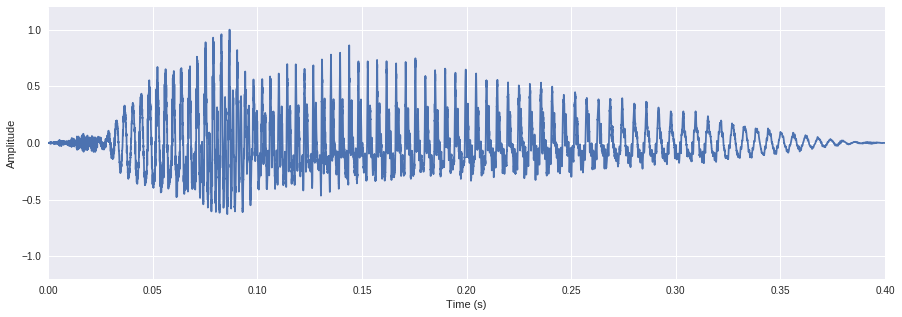

In [3]:
x = x/np.max(np.abs(x), axis = 0)
nx = len(x)
t = np.linspace(0, nx*dt, nx)

print('Sampling frequency (Hz) = ', fs)
print('Signal lenght (samples) = ', nx)

plt.figure(figsize = (15, 5))
plt.plot(t, x)
plt.ylim((-1.2, 1.2)), plt.xlim((0, nx*dt))
plt.xlabel('Time (s)'), plt.ylabel('Amplitude')
plt.show()

### Input buffer for later representations

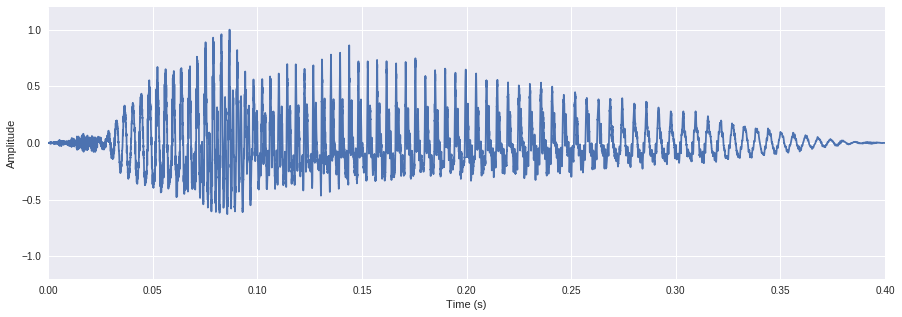

In [4]:
t0 = 0
t1 = 0.4
xi = x[int(t0*fs):int(t1*fs)]
ti = t[int(t0*fs):int(t1*fs)]


plt.figure(figsize = (15, 5))
plt.plot(ti, xi)
plt.ylim((-1.2, 1.2)), plt.xlim((t0, t1))
plt.xlabel('Time (s)'), plt.ylabel('Amplitude')
plt.show()

## Frquency domain representation

- [Discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
- [Fast Fourier transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

Number of frequency bins =  19200
Bin width (Hz) = 2.5


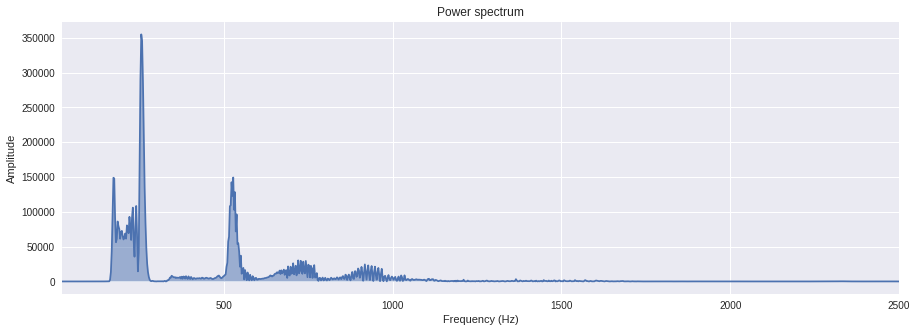

In [5]:
nfft = len(xi)
f = np.linspace(0, fs, nfft)
X = fft(xi, nfft)
PSD = np.abs(X)**2

print('Number of frequency bins = ', nfft)
print('Bin width (Hz) =', fs/nfft )

fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(f, PSD)
ax.fill_between(f, PSD, alpha = 0.5)
ax.set_xlim([20, 2500])
ax.set_xlabel('Frequency (Hz)'), ax.set_ylabel('Amplitude')
ax.set_title('Power spectrum')
plt.show()

## Time-frequency representation (STFT)

- [Short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)
- [Spectrogram](https://en.wikipedia.org/wiki/Spectrogram)

In [6]:
M = 2048 # Length of each segment
poverlap = 0.95 # Percentage of overlap
noverlap = int(np.ceil((M - (M%2))*poverlap));

f, t, STFT = stft(xi, fs, window = 'hann', nperseg = M,
                  noverlap = noverlap, nfft = nfft)

STFTdB = 20*np.log10(np.abs(STFT))
STFTdB = STFTdB-np.max(STFTdB)

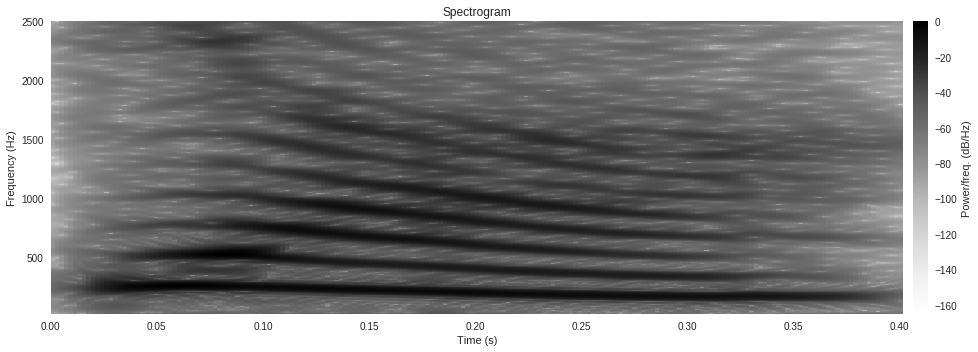

In [7]:
fig, ax = plt.subplots(figsize = (15, 5))
im = ax.pcolormesh(t, f, STFTdB, cmap = 'Greys')
# ax.set_xlim([0,0.5])
ax.set_ylim([20,2500])
ax.set_xlabel('Time (s)'), ax.set_ylabel('Frequency (Hz)')
ax.set_title('Spectrogram')

cb = plt.colorbar(im, pad = 0.01)
cb.set_label('Power/freq. (dB/Hz)')

plt.tight_layout()
plt.show()

## Wavelet representation

- [Discrete wavelet transform](https://en.wikipedia.org/wiki/Discrete_wavelet_transform)
- [Cascading and filter banks](https://en.wikipedia.org/wiki/Discrete_wavelet_transform#/media/File:Wavelets_-_Filter_Bank.png)

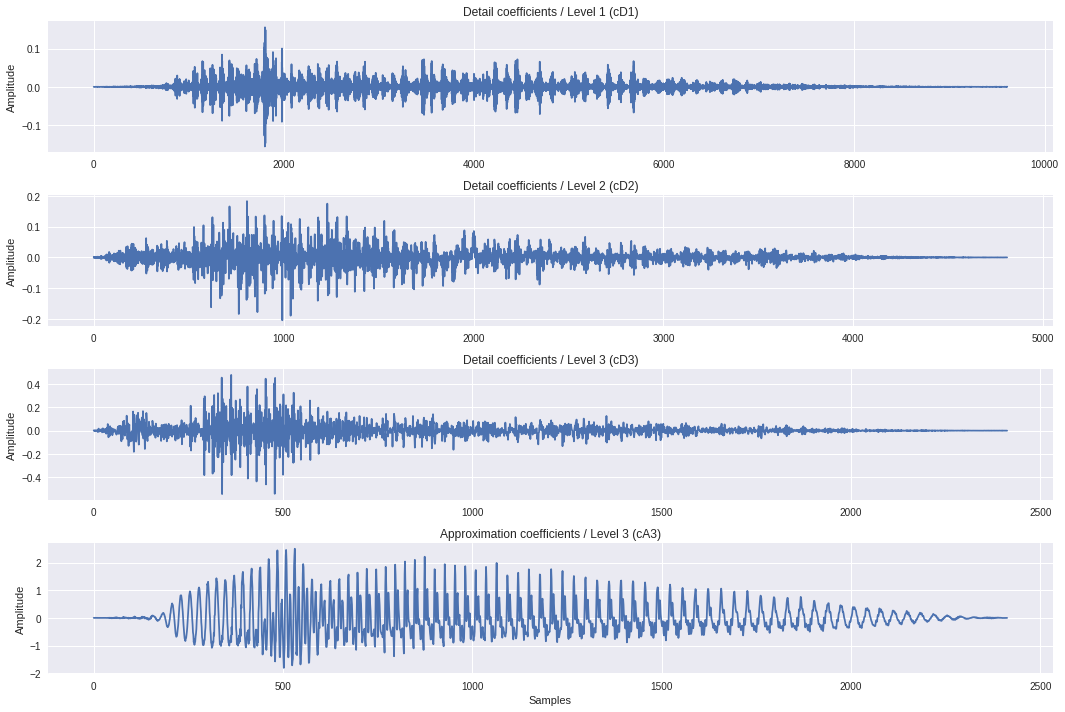

In [8]:
coeffs = wavedec(xi, 'db8', level = 3)
cA3, cD3, cD2, cD1 = coeffs

fig, ax = plt.subplots(4, 1, figsize = (15, 10))
ax[0].plot(cD1)
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Detail coefficients / Level 1 (cD1)')
ax[1].plot(cD2)
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Detail coefficients / Level 2 (cD2)')
ax[2].plot(cD3)
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Detail coefficients / Level 3 (cD3)')
ax[3].plot(cA3)
ax[3].set_xlabel('Samples'), ax[3].set_ylabel('Amplitude')
ax[3].set_title('Approximation coefficients / Level 3 (cA3)')

plt.tight_layout()
plt.show()